<a href="https://colab.research.google.com/github/26112/UFO_TRACKER/blob/main/Auto_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MINI TESLA AUTOPILOT SIMULATOR

Object Movement Table (Real-World Inspired):
    time    x   y  speed
0  00:01  100  50     80
1  00:02  130  55    500
2  00:03  200  40     90
Predicted next position at 00:04: (x: 270m, y: 25m)

Table with Detection:
    time    x   y  speed type
0  00:01  100  50     80  car
1  00:02  130  55    500  UFO
2  00:03  200  40     90  car


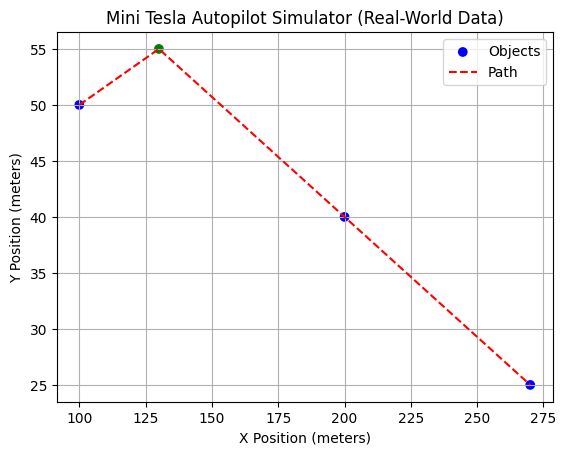

In [7]:
# Mini Tesla Autopilot Simulator by [Anuj Baghel]
import pandas as pd
import matplotlib.pyplot as plt

# Real-world-inspired data: x, y in meters, speed in km/h
object_data = [
    {"time": "00:01", "x": 100, "y": 50, "speed": 80},    # Car on a highway
    {"time": "00:02", "x": 130, "y": 55, "speed": 500},   # UFO zooming in
    {"time": "00:03", "x": 200, "y": 40, "speed": 90}     # Car again
]

# Make it a table
object_table = pd.DataFrame(object_data)
print("Object Movement Table (Real-World Inspired):")
print(object_table)

# Predict next position
last_x_change = object_table["x"].iloc[-1] - object_table["x"].iloc[-2]  # 200 - 130 = 70
last_y_change = object_table["y"].iloc[-1] - object_table["y"].iloc[-2]  # 40 - 55 = -15
next_x = object_table["x"].iloc[-1] + last_x_change       # 200 + 70 = 270
next_y = object_table["y"].iloc[-1] + last_y_change       # 40 + (-15) = 25
print(f"Predicted next position at 00:04: (x: {next_x}m, y: {next_y}m)")

# Detect: car or UFO? (speed > 100 km/h = UFO)
object_table["type"] = object_table["speed"].apply(lambda s: "UFO" if s > 100 else "car")
print("\nTable with Detection:")
print(object_table)

# Add prediction to table
last_type = object_table["type"].iloc[-1]
object_table_with_pred = pd.concat([object_table, pd.DataFrame({"time": ["00:04"], "x": [next_x], "y": [next_y], "speed": ["predicted"], "type": [last_type]})])

# Plot with colors
colors = object_table_with_pred["type"].replace({"car": "blue", "UFO": "green"})
plt.scatter(object_table_with_pred["x"], object_table_with_pred["y"], c=colors, marker="o", label="Objects")
plt.plot(object_table_with_pred["x"], object_table_with_pred["y"], color="red", linestyle="--", label="Path")
plt.title("Mini Tesla Autopilot Simulator (Real-World Data)")
plt.xlabel("X Position (meters)")
plt.ylabel("Y Position (meters)")
plt.grid(True)
plt.legend()
plt.show()